In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def plot_demand(data_set_1, plot_var, title, data_set_2=None):
    """
    Plot the demand for the two data sets
    """
    # Plot for cleaned demand
    plt.figure(figsize=(12, 6))
    plt.plot(data_set_1['date_time'], data_set_1[plot_var], label=f'{title} (2015-2020 file)', color='green', linestyle='dotted', alpha=0.7)
    if data_set_2 is not None:
        plt.plot(data_set_2['date_time'], data_set_2[plot_var], label=f'{title} (2019-2024 file)', color='blue', linestyle='dotted', alpha=0.7)
    plt.xlabel('Date Time')
    plt.ylabel('Cleaned Demand (MW)')
    plt.title(f'{title}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'{title}.pdf')

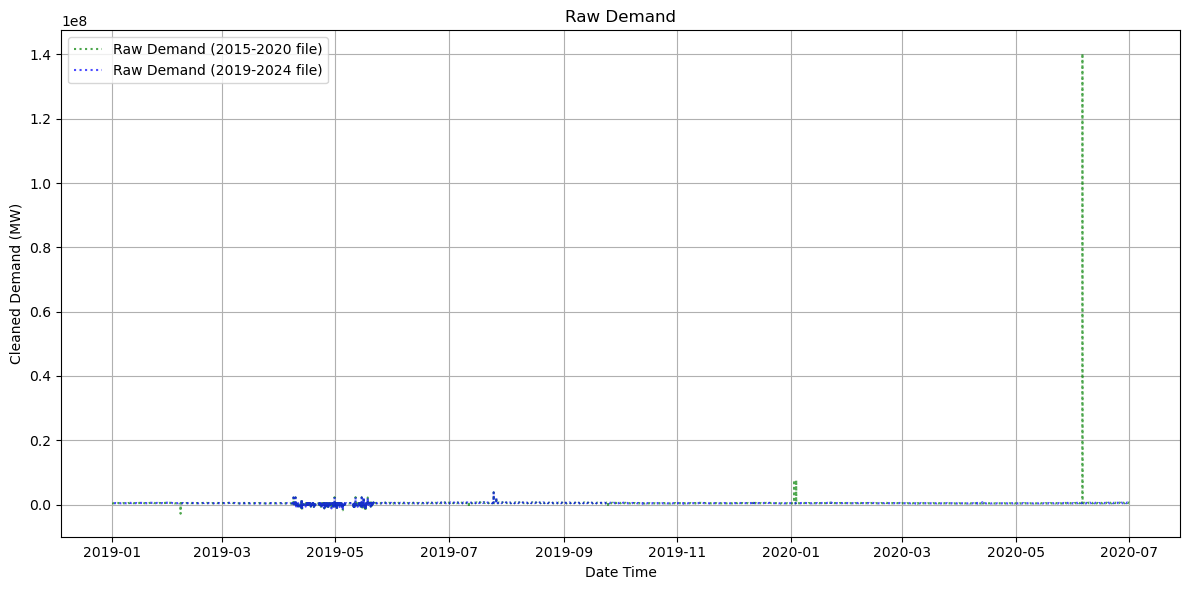

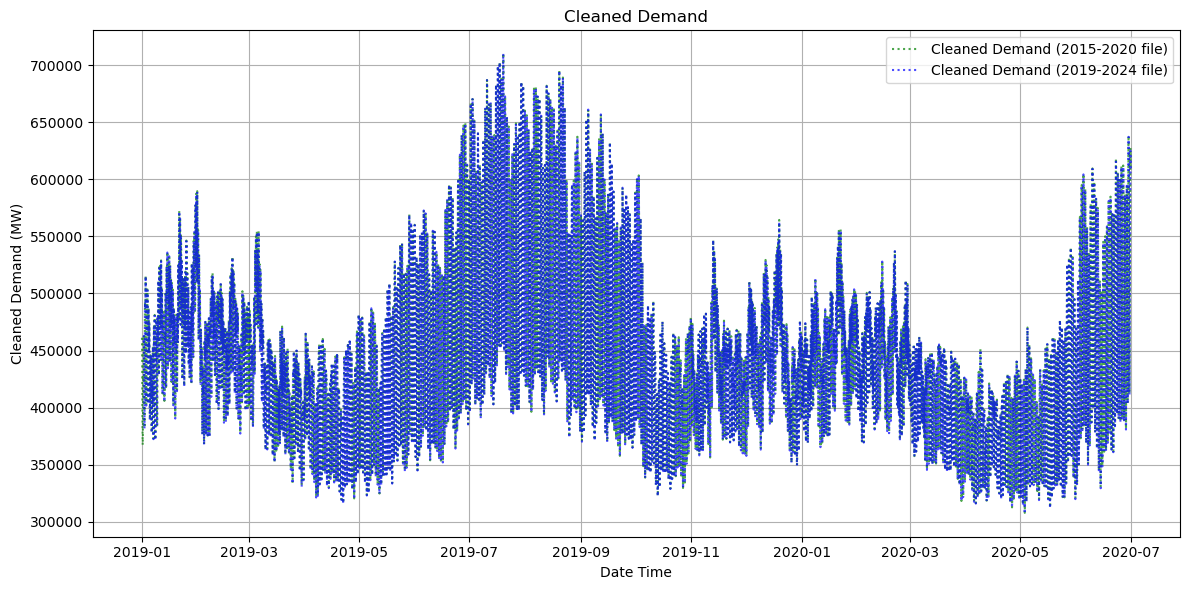

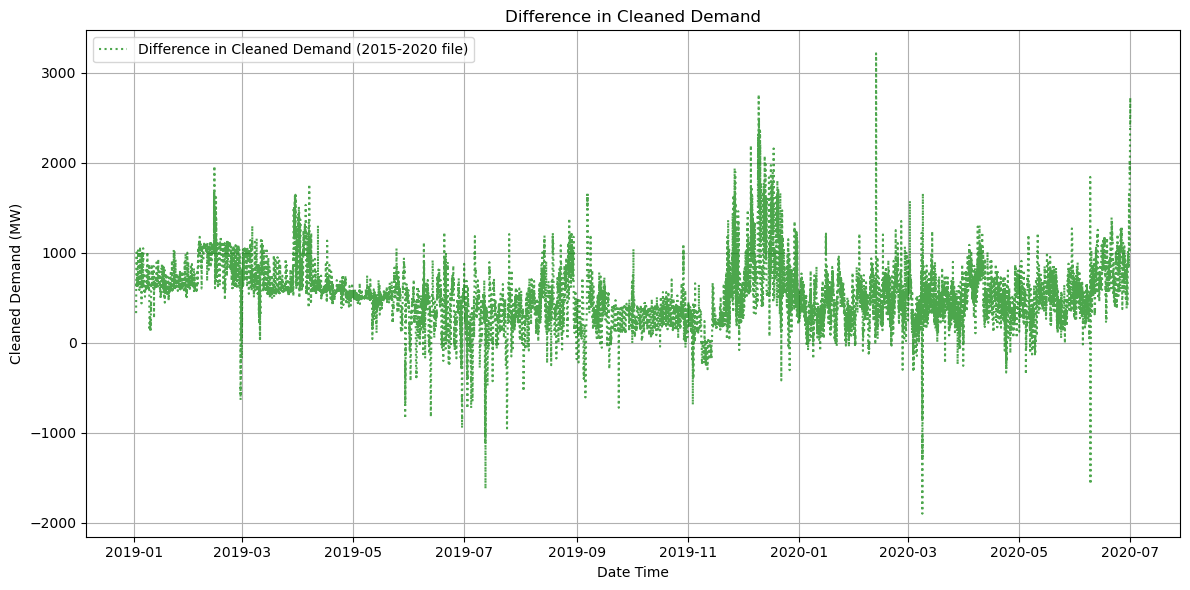

In [3]:
# Load the data from the provided files
file1_path = '../CONUS_2015_2020.csv'
file2_path = '../data/final_results/contiguous_US/CONUS.csv'

data1 = pd.read_csv(file1_path, parse_dates=['date_time'])
data2 = pd.read_csv(file2_path, parse_dates=['date_time'])

# Define the date range for filtering
start_date = '2019-01-01'
end_date = '2020-07-01'

# Filter data for the period 2019 to 2020
data1_filtered = data1[(data1['date_time'] >= start_date) & (data1['date_time'] <= end_date)]
# Exclude maximum raw demand value from 2015-2020 file
# data1_filtered = data1_filtered[data1_filtered['raw demand (MW)'] != data1_filtered['raw demand (MW)'].max()]
data2_filtered = data2[(data2['date_time'] >= start_date) & (data2['date_time'] <= end_date)]

# Plot raw demand
plot_demand(data1_filtered, 'raw demand (MW)', 'Raw Demand', data2_filtered)

# Plot cleaned demand
plot_demand(data1_filtered, 'cleaned demand (MW)', 'Cleaned Demand', data2_filtered)

# Plot difference between two data sets for cleaned demand
diff_df = pd.merge(data1_filtered[['date_time', 'cleaned demand (MW)']], 
                       data2_filtered[['date_time', 'cleaned demand (MW)']], 
                       on='date_time', suffixes=('_2015_2020', '_2019_2024'))
diff_df['difference'] = diff_df['cleaned demand (MW)_2015_2020'] - diff_df['cleaned demand (MW)_2019_2024']
plot_demand(diff_df, 'difference', 'Difference in Cleaned Demand', None)

